In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the Dataset
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Displaying the 1st Five rows of the Dataset#
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Displaying the number of rows and number of columns in the dataset
df.shape

(150, 6)

In [5]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Dropping the Id column
df.drop(['Id'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Checking for null values in the Dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Viewing the Statistical Description about the Dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Displaying the number of samples of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization


/Users/virinchisai/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


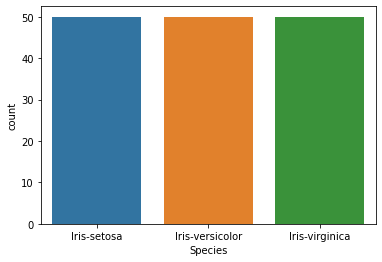

In [10]:
sns.countplot(df['Species']);

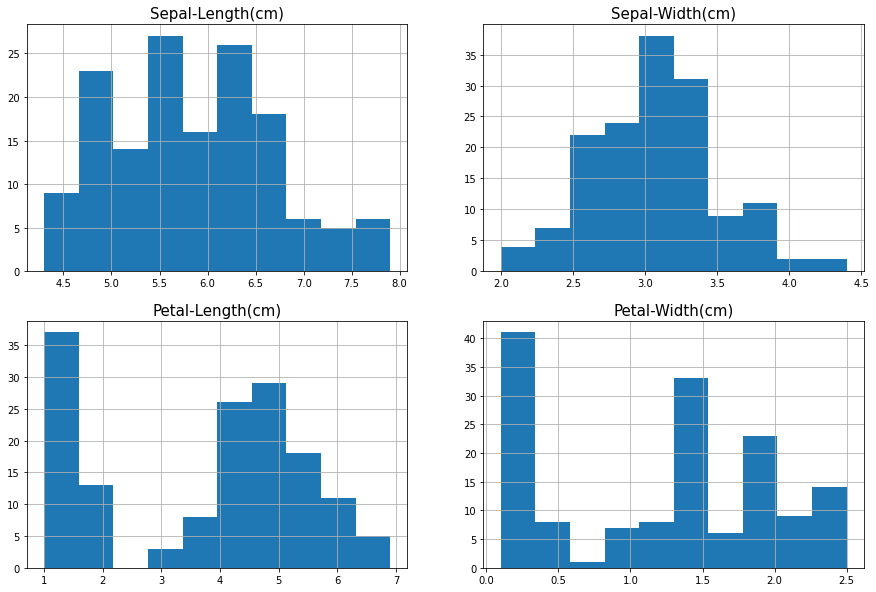

In [11]:
# Plotting the Histogram for the Flower Features
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('Sepal-Length(cm)',fontsize=15)
plt.hist(df['SepalLengthCm'])
plt.grid()

plt.subplot(2,2,2)
plt.title('Sepal-Width(cm)', fontsize=15)
plt.hist(df['SepalWidthCm'])
plt.grid()

plt.subplot(2,2,3)
plt.title('Petal-Length(cm)', fontsize=15)
plt.hist(df['PetalLengthCm'])
plt.grid()

plt.subplot(2,2,4)
plt.title('Petal-Width(cm)', fontsize=15)
plt.hist(df['PetalWidthCm'])
plt.grid()

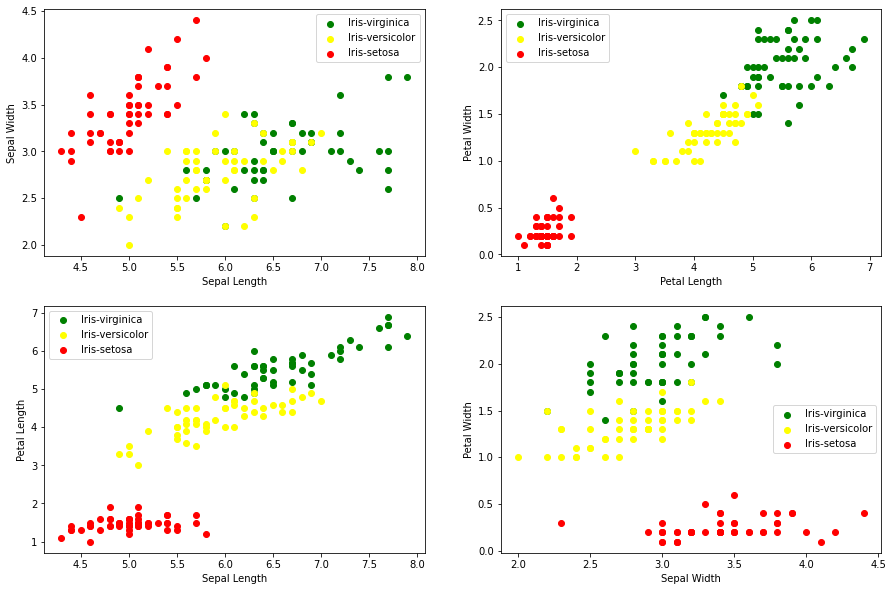

In [13]:
# Scatterplot for the Flower Features (Sepal and Petal Length, and Sepal and Petal Width)
colors = ['green', 'yellow', 'red']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Building the Classification Model

## Encoding the Species column using LabelEncoder

In [14]:
le=LabelEncoder()
df['Encoded_Species']= le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [15]:
print(df['Encoded_Species'].value_counts())

0    50
1    50
2    50
Name: Encoded_Species, dtype: int64


## Splitting the Dataset into Train and Test Data

In [16]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df[['Encoded_Species']]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Training the model using Logistic Regression

In [18]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/Users/virinchisai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/virinchisai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#Accuracy of the Linear Regression Model
model_score=model.score(X_test,Y_test)*100
print("Accuracy:",model_score)

Accuracy: 100.0


In [20]:
a = model.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {a} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [1 1 0 0 0 1 1 2 0 1 1 1 1 2 0 2 0 0 2 2 0 2 0 1 2 0 0 1 2 0] 

Species Names: ['Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa']


## Training the model using Support Vector Machine

In [21]:
svc = SVC()

svc.fit(X_train, Y_train)

/Users/virinchisai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [22]:
svc.score(X_test, Y_test)*100

100.0

In [23]:
a = svc.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {a} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [1 1 0 0 0 1 1 2 0 1 1 1 1 2 0 2 0 0 2 2 0 2 0 1 2 0 0 1 2 0] 

Species Names: ['Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa']


## Training the model using Decision Tree Classifier

In [24]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [25]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
model.score(X_test,Y_test)*100

96.66666666666667

In [27]:
a = model.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of Species: {a} \n")
print(f"Species Names: {predict_species}")

Label Encoded Prediction of Species: [1 1 0 0 0 1 1 2 0 1 1 1 1 2 0 2 0 0 2 2 0 1 0 1 2 0 0 1 2 0] 

Species Names: ['Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa']
